In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\EV-data\Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
#finding the percentage of null valus in each column.
for col in df.columns:
    print(f'{col}: {(len(df[df[col].isnull() == True]) / len(df[col]))* 100}')

VIN (1-10): 0.0
County: 0.002811104989149135
City: 0.002811104989149135
State: 0.0
Postal Code: 0.002811104989149135
Model Year: 0.0
Make: 0.0
Model: 0.0
Electric Vehicle Type: 0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0.0
Electric Range: 0.0
Base MSRP: 0.0
Legislative District: 0.2187039681558027
DOL Vehicle ID: 0.0
Vehicle Location: 0.005059988980468442
Electric Utility: 0.002811104989149135
2020 Census Tract: 0.002811104989149135


In [7]:
# drop the null values
df = df.dropna()

For the task of market size of electric vehicles analysis, we can explore the following areas:

1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.



#### Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

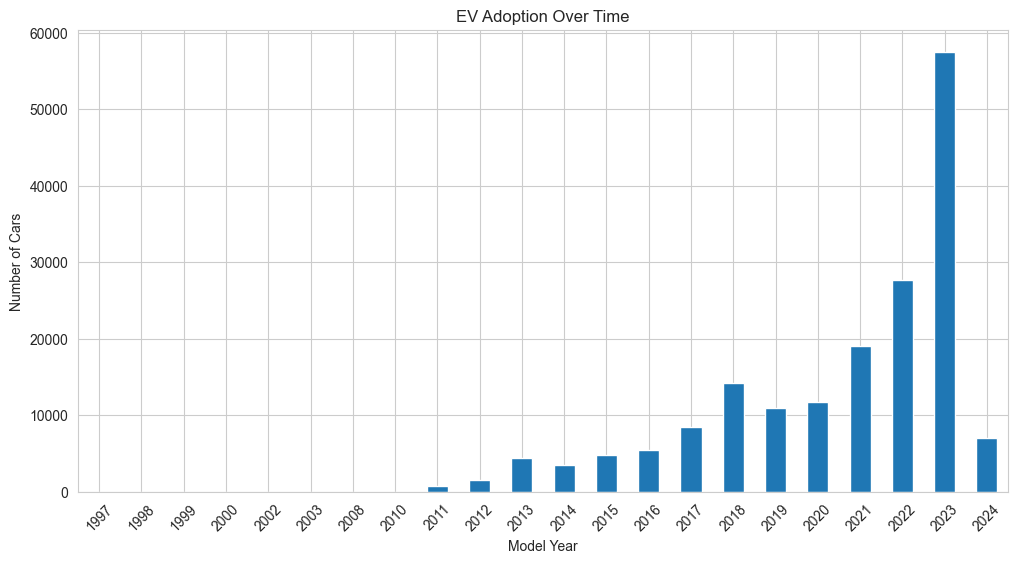

In [59]:
plt.figure(figsize=(12,6));
#grouping the data by the Model Year to get the size of Vehicles in each Year. 
df.groupby(by='Model Year').size().plot(kind='bar');
plt.ylabel('Number of Cars');
plt.title('EV Adoption Over Time');
plt.xticks(rotation=45);

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.
And it appeares that 2024 data is incomplete.

#### Understand where EVs are most commonly registered

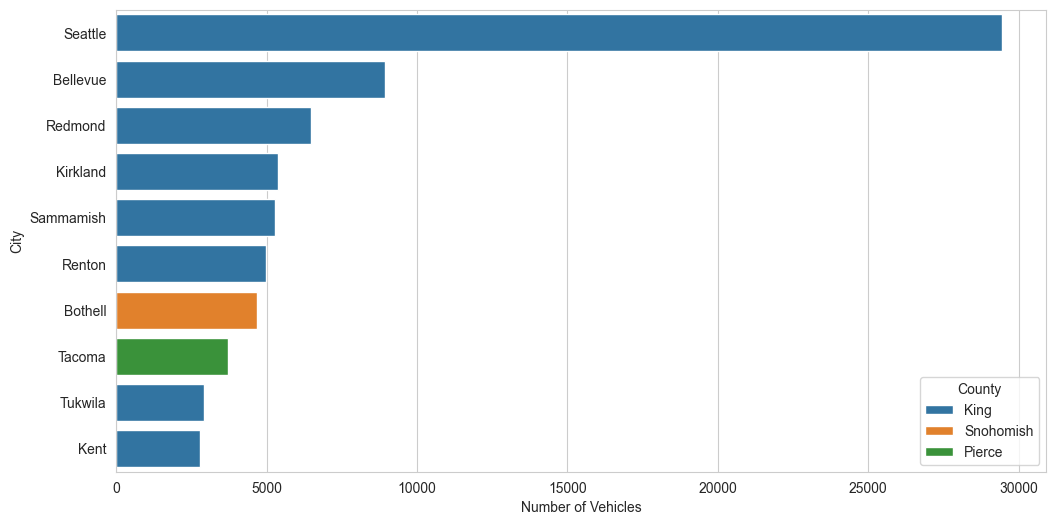

In [9]:
plt.figure(figsize=(12,6));
#selecting the Top 3 Counties with the highest Number of Vehicles.
top_counties = df['County'].value_counts().head(3)
#getting the data for the counties.
cities_data = df[df['County'].isin(top_counties.index)]
#grouping by the County and the City based on Size and selecting the top 10 Cities.
cities = cities_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles').head(10)
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=cities);


    The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

-Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.

-Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.

-Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.

-Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.

-The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.

Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

#### Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV)

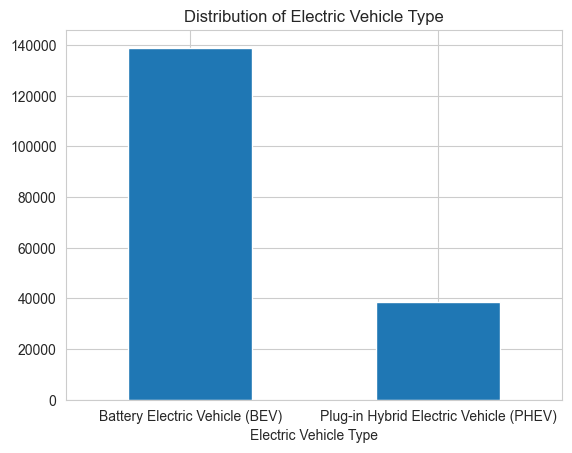

In [10]:
df['Electric Vehicle Type'].value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.title('Distribution of Electric Vehicle Type');

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

In [57]:
#grouping the data by the manufacturer
make = df.groupby('Make').size().sort_values(ascending=False).reset_index(name='Number of vehicles').head(10)

C:\Users\dell\AppData\Local\Temp\ipykernel_12048\3303299862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of vehicles', y= 'Make' , data=make, palette="cubehelix");


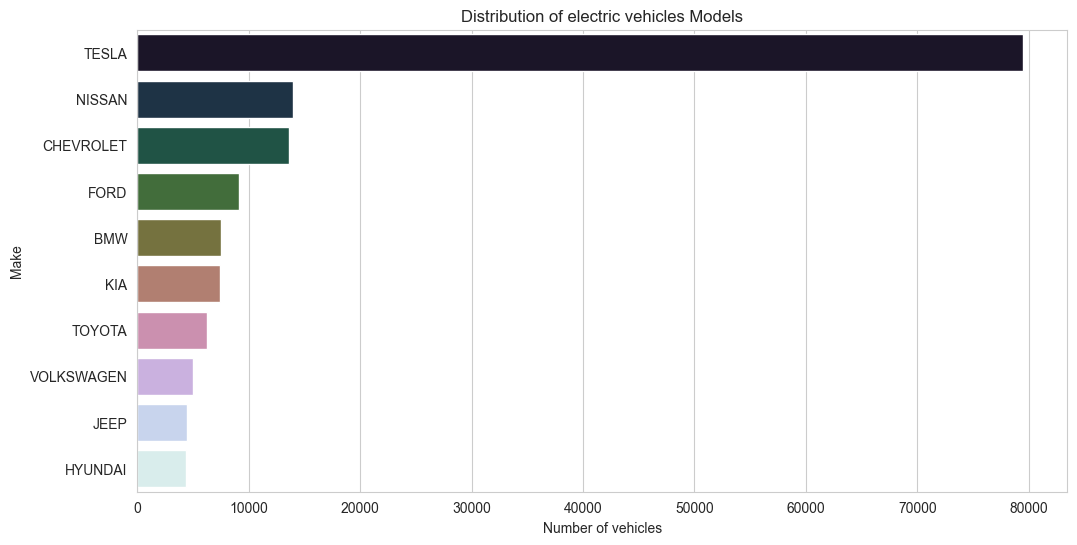

In [14]:
plt.figure(figsize=(12,6));
sns.barplot(x='Number of vehicles', y= 'Make' , data=make, palette="cubehelix");
plt.title('Distribution of electric vehicles Models');

The above chart shows that:

-TESLA leads by a substantial margin with the highest number of vehicles registered.

-NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

-FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

#### Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

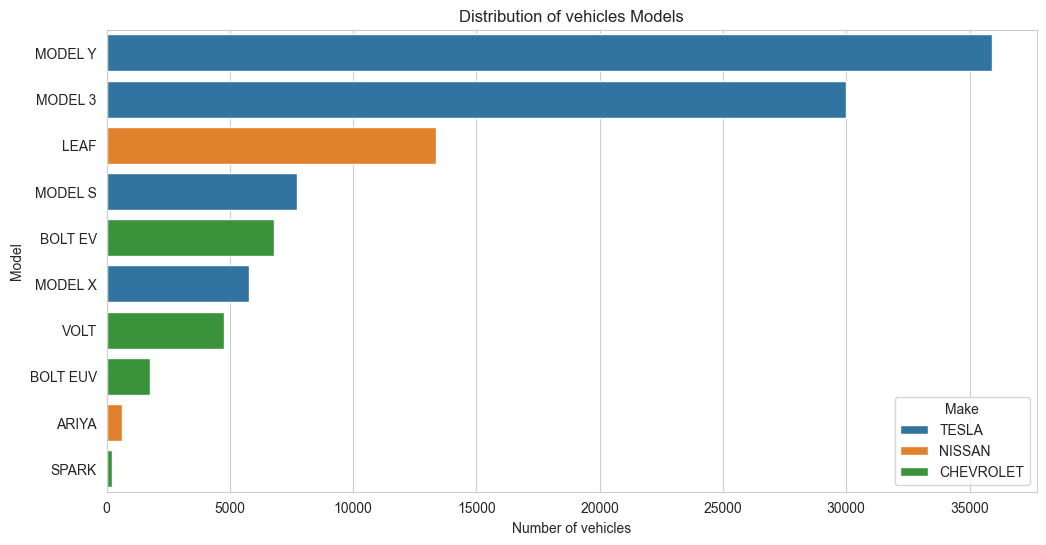

In [15]:
plt.figure(figsize=(12,6));
#selecting the top 3 Manufactureres based on the highest value counts.
top_manifacter = df['Make'].value_counts().sort_values(ascending=False).head(3).index
#getting the data for the top 3 manufactureres.
top_manifacter_data = df[df['Make'].isin(top_manifacter)]
#grouping by the Manufacturer and the Model based on Size and selecting the top 10 Models.
models = top_manifacter_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of vehicles').head(10)
sns.barplot(x='Number of vehicles', y = 'Model', data=models, hue= 'Make');
plt.title('Distribution of vehicles Models');

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

-TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.

-NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.

-TESLA’s MODEL S and MODEL X also have a significant number of registrations.

-CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.

-NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

#### Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles.

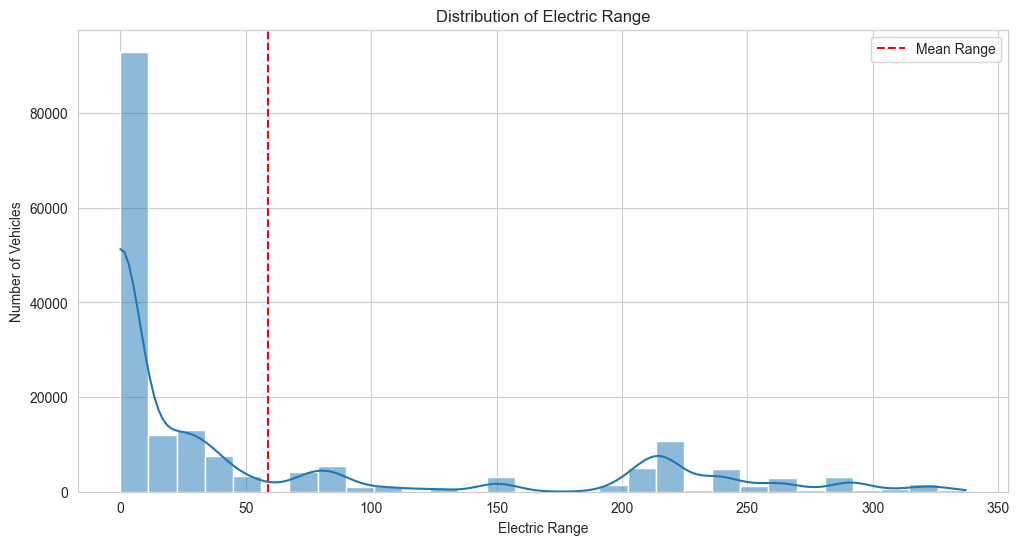

In [58]:
plt.figure(figsize=(12,6));
#making a histogram of the Electric Range.
sns.histplot(df['Electric Range'], bins=30, kde=True);
#Adding a vertical line that represents the Mean Range.
plt.axvline(df['Electric Range'].mean(), linestyle='--', c='r', label='Mean Range');
plt.ylabel('Number of Vehicles');
plt.legend();
plt.title('Distribution of Electric Range');

    The above graph shows the mean electric range. Key observations from the graph include:

-There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.

-The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.

-The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.

-Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

#### Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time.

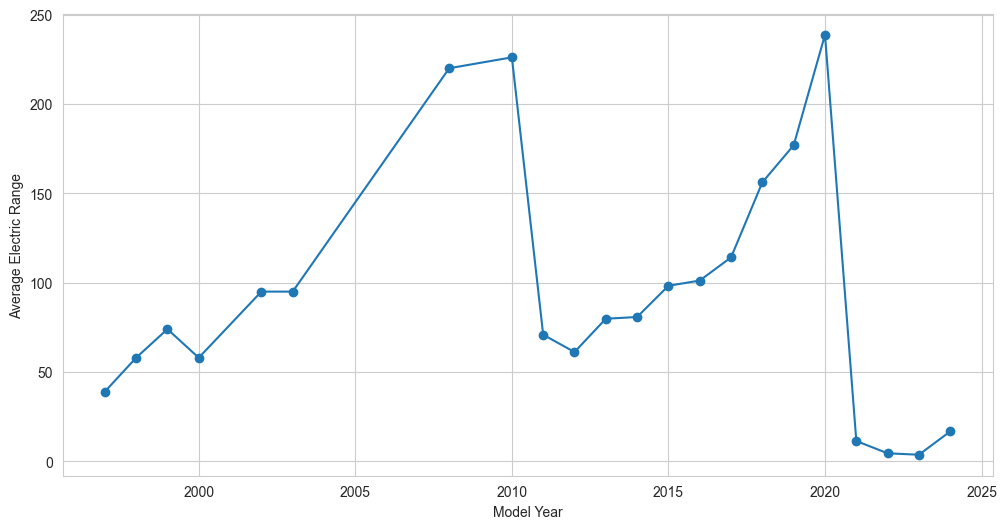

In [17]:
plt.figure(figsize=(12,6));
#grouping by the Electric Range and plotting the men for each Year. 
df.groupby('Model Year')['Electric Range'].mean().plot(style='o-');
plt.ylabel('Average Electric Range');

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:


-There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.

-There is a noticeable peak around the year 2020 when the average range reaches its highest point.

-Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

-After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.
The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

#### Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

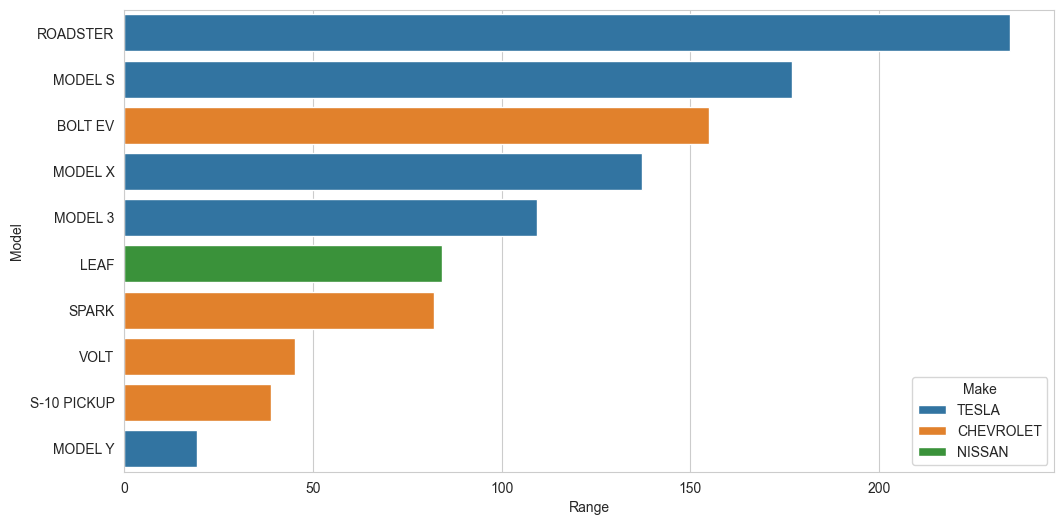

In [18]:
plt.figure(figsize=(12, 6));
#grouping the data by the Manufacturer and the Model and selecting the top 10 Models based on the Average Electric Range.
average_range = top_manifacter_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index(name='Range').head(10)
sns.barplot(x='Range', y='Model', data= average_range, hue='Make');

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.